# Esercitazione 4 - Lasso e Perceptrone

Vi rircordate che Ridge regression penalizzava la soluzione con un termine modificato da un parametro?
Oggi vediamo come cambia l'allenamento di un algoritmo predittivo in base a questo termine.
Per farlo, ci serviamo di Lasso.

<a target="_blank" href="https://colab.research.google.com/github/zangobot/BusinessAnalytics_TeachingMaterial/blob/main/Esercitazione%204%20-%20Lasso%20e%20Perceptrone.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Lasso risolve il seguente problema:

$min_w ||y - Xw||^2_2 + \alpha * ||w||_1$

dove $\alpha$ controlla la norma 1 della retta che stiamo calcolando.
Che cosa significa?
Che altro algoritmo vi ricorda?



In [207]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

data = pd.read_csv('dati/penguins_size.csv').dropna()
X, Y = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']], data[
    'sex']  # ATTENZIONE: ci sono dei dati con il valore '.' all'interno del dataset
X, Y = X[Y != '.'], Y[Y != '.']

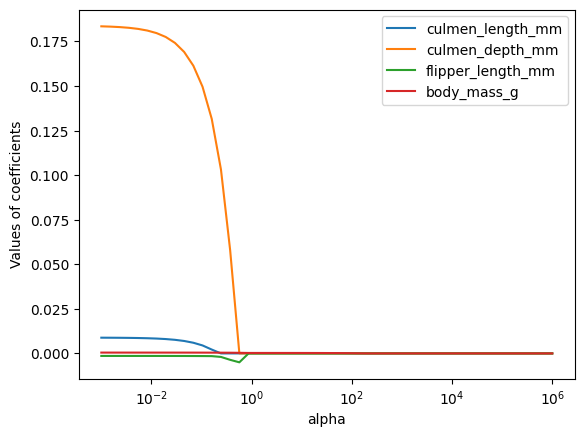

In [208]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

encoder = LabelEncoder()  # ATTENZIONE: Lasso non accetta valori stringa come classi (a differenza di KNN), bisogna quindi codificarle come numeri
alphas = np.logspace(-3, 6, 50)
lasso_clfs = []
lasso_coefs = np.zeros((len(alphas), X.shape[1]))
for i, alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha)
    labels = encoder.fit_transform(Y)
    lasso.fit(X, labels)
    lasso_coefs[i] = lasso.coef_
    lasso_clfs.append(lasso)

for n, c in zip(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], lasso_coefs.T):
    plt.semilogx(alphas, c, label=n)
plt.xlabel('alpha')
plt.ylabel('Values of coefficients')
plt.legend()

I dati vengono pesati in modo diverso dal modello al variare del parametro di regolarizzazione $\alpha$.
Che cosa sta succedendo in particolare?

Lasso ha la stessa formulazione di Ridge, ma con un termine di penalità diverso.

$min_w ||y - Xw||^2_2 + \alpha * ||w||_2$

Ridge regression utilizza la norma 2 come penalità della soluzione, mentre Lasso usa la norma 1.

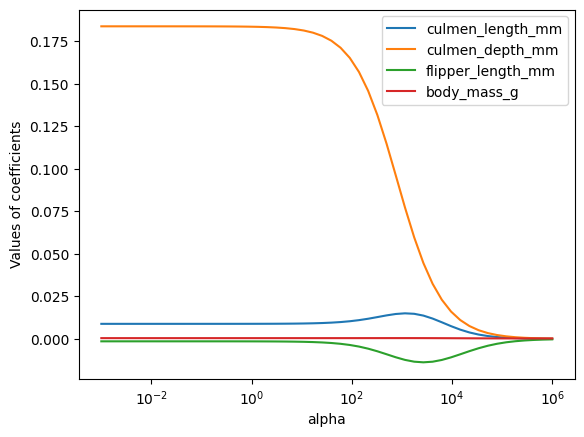

In [209]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

alphas = np.logspace(-3, 6, 50)

ridge_coefs = np.zeros((len(alphas), X.shape[1]))
for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha)
    labels = encoder.fit_transform(Y)
    ridge.fit(X, labels)
    ridge_coefs[i] = ridge.coef_

for n, c in zip(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], ridge_coefs.T):
    plt.semilogx(alphas, c, label=n)
plt.xlabel('alpha')
plt.ylabel('Values of coefficients')
plt.legend()

Quali sono le differenze con Lasso?

# Perceptrone

Chiudiamo il laboratorio di oggi con un ultimo classificatore lineare: il perceptrone, ossia la base delle reti neurali moderne.
Il modello è il seguente:

$f(x) = sign(w^t x + b)$

ossia il prodotto scalare dei pesi con i dati, spostati usando l'intercetta.
Il segno di queste operazioni ci determina quale delle due classi stiamo predicendo.

In [210]:
from sklearn.metrics import accuracy_score


def compute_accuracy(clf, X, Y):
    y_pred = clf.predict(X)
    accuracy = accuracy_score(Y, y_pred)
    print(f"L'accuratezza del modello è {accuracy:.2f}")
    print(
        f"Il modello classifica male il {1 - accuracy:.2f} % dei punti, ossia {int((1 - accuracy) * X.shape[0])} punti")

In [213]:
from sklearn.linear_model import Perceptron

labels = ['Gentoo', 'Adelie']

gentoos = data[data['species'] == 'Gentoo'][['culmen_length_mm', 'culmen_depth_mm']]
adelies = data[data['species'] == 'Adelie'][['culmen_length_mm', 'culmen_depth_mm']]
yg = ['Gentoo'] * gentoos.shape[0]
ya = ['Adelie'] * adelies.shape[0]
X = pd.concat((gentoos, adelies))
Y = yg + ya
Y = LabelEncoder().fit_transform(Y)
perceptron = Perceptron()
perceptron.fit(X, Y)
compute_accuracy(perceptron, X, Y)

L'accuratezza del modello è 1.00
Il modello classifica male il 0.00 % dei punti, ossia 0 punti


Ora proviamo ad allenare un classificatore su un dataset più complesso.

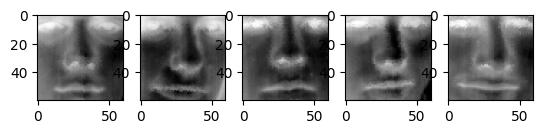

In [303]:
def create_face_dataset():
    with open('dati/face_x.txt') as h:
        all_faces = h.readlines()
    for i, f in enumerate(all_faces):
        f = [float(w) for w in f.split(' ')]
        all_faces[i] = np.array(f)

    X = np.array(all_faces)
    with open('dati/face_y.txt') as h:
        labels = h.readlines()
    for i, f in enumerate(labels):
        labels[i] = int(float(f.strip('\n')))

    Y = np.array(labels)
    return X, Y


Xf, Yf = create_face_dataset()

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(1 - Xf[i, :].reshape(60, 60), cmap='gray')

0.964706 0.211765
L'accuratezza del modello è 0.49
Il modello classifica male il 0.51 % dei punti, ossia 46 punti


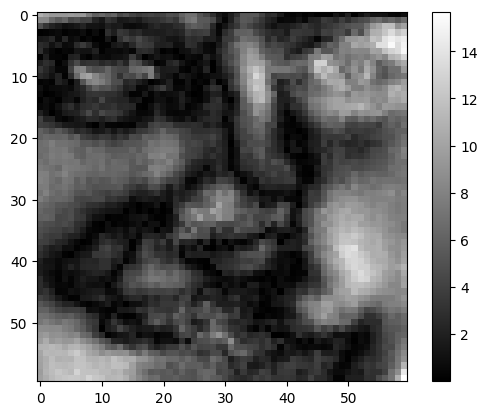

In [306]:
perceptron = Perceptron()
perceptron.fit(Xf, Yf)
compute_accuracy(perceptron, Xf, Yf)
plt.imshow(np.abs(perceptron.coef_).reshape(60, 60), cmap='gray')
plt.colorbar()

In [300]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Yf, perceptron.predict(Xf))

array([[ 0, 46],
       [ 0, 44]])

## Esercizio

Caricate il dataset Pedestrian in un array di numpy.
Il dataset ha un sample per riga, l'ultimo elemento è la label.
I sample sono immagini 18 * 36 = 648 dimensioni.
La classe 1 è associata ai pedoni, classe -1 a tutto il resto.
Create un Perceptrone che classifichi questo dataset.
Stampate in output la matrice di confusione.